To start, we need to import the modules we'll need later

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from Bio import Entrez
import csv
from collections import defaultdict

Next, we decide what we want to search for and open an API to access PubMed data, using ESearch to allow us to retrieve full records from PubMed.  Below, define the keyword you want to search for.  It should be formatted 'like+this'.  A search term for alcohol addiction has been given as an example.  You must also provide a valid email address to use with Entrez.

In [12]:
keyword = 'alcohol+addiction'

In [13]:
Entrez.email = 'kalawson@vassar.edu'

In [14]:
handle = Entrez.esearch(db='pubmed', term=keyword, field = 'tile', retmode='xml', idtype='acc', mindate='2000', maxdate='2010')
data = Entrez.read(handle)

ESearch gives us a lot of information, but it's in the form of ID numbers, not titles, authors, or any other relevant information.  To make it easier to read, we'll use ESummary to search PubMed using the ID numbers we got from ESearch.

In [15]:
UID = data['IdList']

In [16]:
record_1 = Entrez.esummary(db='pubmed', id=UID[1])
attributes_list_1 = Entrez.read(record_1)

for attributes_1 in attributes_list_1:
    for key1, value1 in attributes_1.items():
        print(key1, value1)

Item []
Id 21192139
PubDate 2011 Feb
EPubDate 
Source J Clin Psychopharmacol
AuthorList ['Kranzler HR', 'Armeli S', 'Tennen H', 'Covault J', 'Feinn R', 'Arias AJ', 'Pettinati H', 'Oncken C']
LastAuthor Oncken C
Title A double-blind, randomized trial of sertraline for alcohol dependence: moderation by age of onset [corrected] and 5-hydroxytryptamine transporter-linked promoter region genotype.
Volume 31
Issue 1
Pages 22-30
LangList ['English']
NlmUniqueID 8109496
ISSN 0271-0749
ESSN 1533-712X
PubTypeList ['Journal Article', 'Randomized Controlled Trial']
RecordStatus PubMed - indexed for MEDLINE
PubStatus ppublish
ArticleIds {'medline': [], 'pubmed': ['21192139'], 'doi': '10.1097/JCP.0b013e31820465fa', 'pii': '00004714-201102000-00006', 'pmc': 'PMC3130300', 'mid': 'NIHMS302919', 'rid': '21192139', 'eid': '21192139', 'pmcid': 'pmc-id: PMC3130300;manuscript-id: NIHMS302919;'}
DOI 10.1097/JCP.0b013e31820465fa
History {'medline': ['2011/10/14 06:00'], 'pubmed': ['2010/12/31 06:00'], 'entrez

In [17]:
record_2 = Entrez.esummary(db='pubmed', id=UID[2])
attributes_list_2 = Entrez.read(record_2)

for attributes_2 in attributes_list_2:
    for key2, value2 in attributes_2.items():
        print(key2, value2)

Item []
Id 21190410
PubDate 2011
EPubDate 
Source Subst Use Misuse
AuthorList ['Gustafson DH', 'Shaw BR', 'Isham A', 'Baker T', 'Boyle MG', 'Levy M']
LastAuthor Levy M
Title Explicating an evidence-based, theoretically informed, mobile technology-based system to improve outcomes for people in recovery for alcohol dependence.
Volume 46
Issue 1
Pages 96-111
LangList ['English']
NlmUniqueID 9602153
ISSN 1082-6084
ESSN 1532-2491
PubTypeList ['Journal Article']
RecordStatus PubMed - indexed for MEDLINE
PubStatus ppublish
ArticleIds {'medline': [], 'pubmed': ['21190410'], 'doi': '10.3109/10826084.2011.521413', 'pmc': 'PMC3179272', 'mid': 'NIHMS317050', 'rid': '21190410', 'eid': '21190410', 'pmcid': 'pmc-id: PMC3179272;manuscript-id: NIHMS317050;'}
DOI 10.3109/10826084.2011.521413
History {'medline': ['2011/04/13 06:00'], 'pubmed': ['2010/12/31 06:00'], 'entrez': '2010/12/31 06:00'}
References []
HasAbstract 1
PmcRefCount 43
FullJournalName Substance use & misuse
ELocationID doi: 10.3109/1082

This returns all the attributes for the most recent articles published in PubMed that include our keyword.  We can compile these attributes into a .csv file to make them easy to share.

In [18]:
import csv
csv_columns = ['Item','Id','PubDate', 'EPubDate', 'Source', 'AuthorList', 'LastAuthor', 'Title', 'Volume', 'Issue', 'Pages', 'LangList', 'NlmUniqueID', 'ISSN', 'ESSN', 'PubTypeList', 'RecordStatus', 'PubStatus', 'ArticleIds', 'DOI', 'History', 'References', 'HasAbstract', 'PmcRefCount', 'FullJournalName', 'ELocationID', 'SO']
dict_data = [attributes_1, attributes_2]
csv_file = "PubMed_Output.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for info in dict_data:
            writer.writerow(info)
except IOError:
    print("I/O error")

After formatting the citation and putting it into a .csv file, we can to display the data as a bar graph of number of references for each of the articles.

In [19]:
citation = defaultdict(list)

for cite in (attributes_1, attributes_2): 
    for key, value in cite.items():
        citation[key].append(value)

print(citation['LastAuthor'])

['Oncken C', 'Levy M']


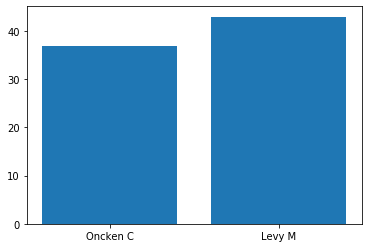

In [20]:
attribute_data_plot = plt.bar(citation['LastAuthor'], citation['PmcRefCount'])
plt.ylabel = 'Number of References'
plt.xlabel = 'Author'
plt.title = 'Number of References by Author'
plt.show()

Alternatively, if you chose to search by author instead of title at the top, you can display a bar graph to see that author's most cited works.

In [ ]:
#author_data  = plt.bar(citation['Title'], citation['PmcRefCount'])
#plt.ylabel = 'Number of References'
#plt.xlabel = 'Title
#plt.set_title = "Most Cited Publications"
#plt.show()